# Task 2 - Exploratory Data Analysis & Features Engineering & RFM analysis

💙 **Objective** :
- Recommend which of these 1000 new customers should be targeted to drive the most value for Sprocket Central company Customers using the existing 3 datasets (**transactions，Customer demographic, customer address and**）


In [985]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
import os
from IPython.display import display
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

## Data Overview

In [987]:
cus = pd.ExcelFile("/Users/super_enbicycle/Documents/UBC/BAMA_517/KPMG/Worksheet in KPMG Project.xlsx")

In [988]:
Transactions = pd.read_excel(cus, 'Transactions', header=1)
NewCustomerList = pd.read_excel(cus, 'NewCustomerList', header=1)
CustomerDemographic = pd.read_excel(cus, 'CustomerDemographic', header=1)
CustomerAddress = pd.read_excel(cus, 'CustomerAddress', header=1)

## 1. Transactions Dataset

In [990]:
## drop the NA value
Transactions.dropna(inplace=True)

In [991]:
# convert the interger data column to datetime
Transactions1 = Transactions.copy()
dt = ['transaction_date', 'product_first_sold_date']
Transactions1[dt] = Transactions1[dt].astype('datetime64[ns]')

In [992]:
# covert to object
ls_id = ['transaction_id', 'product_id', 'customer_id']
Transactions1[ls_id] = Transactions1[ls_id].astype('object')

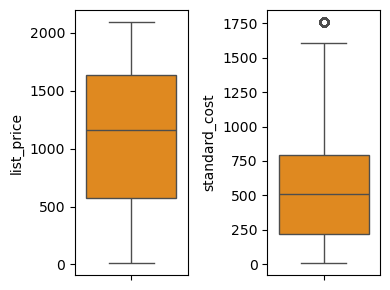

In [993]:
# check outlier
nums = ['list_price', 'standard_cost']
plt.figure(figsize=(4, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=Transactions1[nums[i]], color='darkorange', orient='v')
    plt.tight_layout()

## 2. NewCustomerList Dataset

In [994]:
## deletet the unnamed columns
NewCustomerList = NewCustomerList.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1)

In [995]:
### Update the gender column 
NewCustomerList.loc[NewCustomerList['gender'] == 'U', 'gender'] = 'Unspecified'

In [996]:
### drop unnecessary columns
NewCustomerList = NewCustomerList.drop(['Rank', 'Value'], axis=1)

## 3. CustomerDemographic Dataset

In [997]:
## change the gender column format
CustomerDemographic.loc[CustomerDemographic['gender'] == 'F', 'gender'] = 'Female'
CustomerDemographic.loc[CustomerDemographic['gender'] == 'Femal', 'gender'] = 'Female'
CustomerDemographic.loc[CustomerDemographic['gender'] == 'U', 'gender'] = 'Unspecified'
CustomerDemographic.loc[CustomerDemographic['gender'] == 'M', 'gender'] = 'Male'

In [998]:
### Drop the default column
CustomerDemographic = CustomerDemographic.drop('default', axis=1)

In [999]:
### Change the state as abbreviation expression
CustomerAddress.loc[CustomerAddress['state'] == 'New South Wales', 'state'] = 'NSW'
CustomerAddress.loc[CustomerAddress['state'] == 'Victoria', 'state'] = 'VIC'

In [1000]:
# convert datatype customer id
CustomerDemographic['customer_id']= CustomerDemographic['customer_id'].astype('object')

In [1023]:
CustomerDemographic['DOB'] = pd.to_datetime(CustomerDemographic['DOB'])
target_year = 2017
CustomerDemographic['Age'] = target_year - CustomerDemographic['DOB'].dt.year

## 4. CustomerAddress datasets

In [1001]:
# remove irrelevant columns for analysis in customer address 
CustomerAddress1 = CustomerAddress.copy()
CustomerAddress1.drop(columns=['address', 'postcode', 'country'], inplace=True)

In [1002]:
# convert datatype customer id
CustomerAddress1['customer_id']= CustomerAddress1['customer_id'].astype('object')

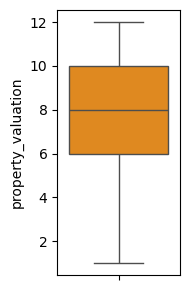

In [1003]:
# check outlier
plt.figure(figsize=(2, 3))
sns.boxplot(y=CustomerAddress1['property_valuation'], color='darkorange', orient='v')
plt.tight_layout()

## 2.Data Integration and merge

### a. Merge CustomerDemographics with CustomerAddress

In [1024]:
cus1 = pd.merge(CustomerDemographic,CustomerAddress1,on='customer_id')
cus1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,state,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,64.0,NSW,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,37.0,NSW,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,56.0,QLD,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,40.0,NSW,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,51.0,VIC,9


### a.1. Merge CustomerAddress and Transaction

In [1007]:
cus2 = pd.merge(Transactions1, cus1,on='customer_id')
cus2.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,VIC,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,89,1979-02-04 00:00:00,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,NSW,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,89,1979-02-04 00:00:00,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,NSW,5


In [911]:
cus2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19416 entries, 0 to 19415
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19416 non-null  object        
 1   product_id                           19416 non-null  object        
 2   customer_id                          19416 non-null  object        
 3   transaction_date                     19416 non-null  datetime64[ns]
 4   online_order                         19416 non-null  float64       
 5   order_status                         19416 non-null  object        
 6   brand                                19416 non-null  object        
 7   product_line                         19416 non-null  object        
 8   product_class                        19416 non-null  object        
 9   product_size                         19416 non-null  object        
 10  list_price

## 3. EDA
### (1) Transaction Data

In [912]:
cus_merged = cus2.copy()
cus_merged.reset_index(inplace = True, drop = True)
tran = cus_merged.copy()

In [913]:
# deeper analysis of datetime data by breaking it down into more specific parts
tran['transaction_year'] = tran['transaction_date'].dt.strftime('%Y')
tran['transaction_month'] = tran['transaction_date'].dt.strftime('%B')
tran['transaction_quarter'] = tran['transaction_date'].dt.quarter.astype(str)
tran['transaction_day'] = tran['transaction_date'].dt.strftime('%d')
tran['transaction_weekday'] = tran['transaction_date'].dt.strftime('%A')
tran.drop(['transaction_date'],axis=1,inplace=True)

### number of transactions per month

In [915]:
# aggregate by month
transaction_per_month = tran.groupby(['transaction_month'])[['customer_id']].count()
transaction_per_month.reset_index(inplace=True)
transaction_per_month.columns = ['month', 'number_of_transaction']

# order by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
transaction_per_month['month'] = pd.Categorical(transaction_per_month['month'], month_order)
transaction_per_month.sort_values('month', inplace=True)
transaction_per_month

,month,number_of_transaction
4,January,1631
3,February,1577
7,March,1593
0,April,1611
8,May,1639
6,June,1536
5,July,1668
1,August,1700
11,September,1528
10,October,1720


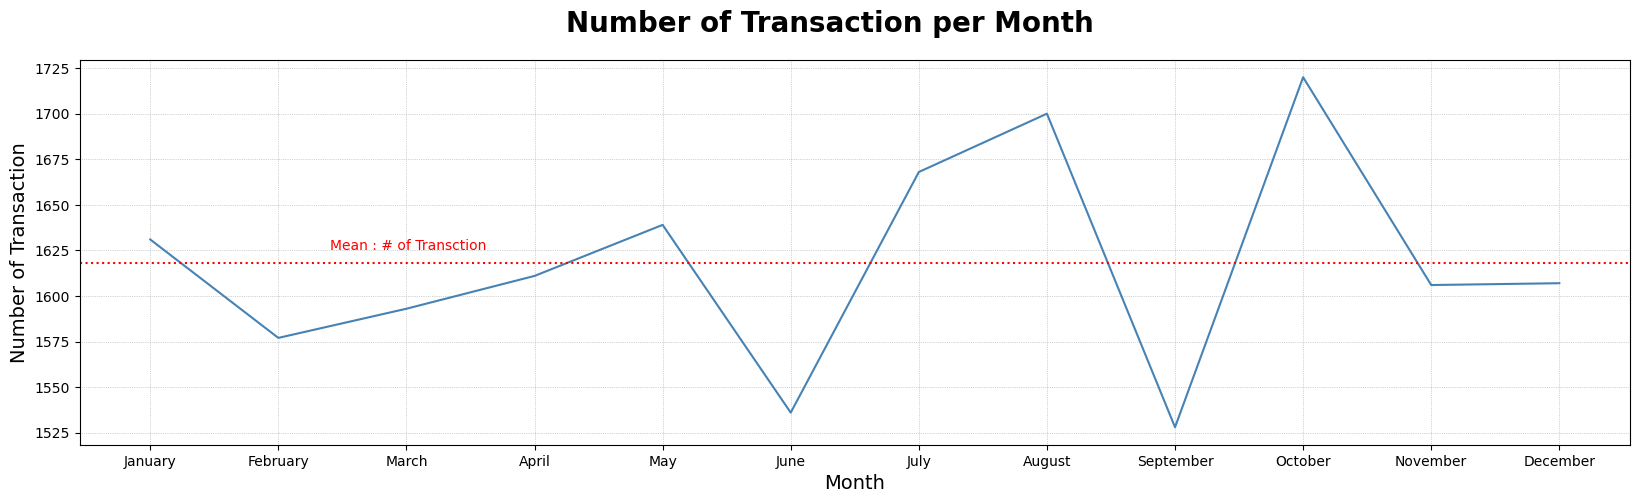

In [917]:
# visualization by months
fig = plt.figure(figsize=(20, 5))

fig.suptitle('Number of Transaction per Month', fontsize=20, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Transaction', fontsize=14)

x = transaction_per_month['month']
y = transaction_per_month['number_of_transaction']
mean = y.mean()

plt.plot(x, y, color = 'steelblue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.axhline(y=mean, color='red', linestyle=':')
plt.text(0.25, 0.5, 'Mean : # of Transction', transform=fig.transFigure, color='red')
plt.show()

### (2) Product data

In [918]:
product = cus_merged.copy()

In [919]:
summary = product[['brand', 'product_line', 'product_class', 'product_size']].describe().T
summary['% top'] = summary['freq']/summary['count']*100
summary

,count,unique,top,freq,% top
brand,19416,6,Solex,4164,21.44623
product_line,19416,4,Standard,13901,71.595591
product_class,19416,3,medium,13563,69.854759
product_size,19416,3,medium,12747,65.65204


- The **most purchased brand** by customers is **Solex** with a percentage of **21.48%**.
- The majority of customers **71.59% purchased Standard** bikes.
- There are **69.85%** of customers purchased a **medium class** bikes.
- There are **65.65%** of customers purchased a **medium size** bikes.

### a. brand

In [920]:
# brand percentage overview
brand = product['brand'].value_counts().reset_index()
brand.columns = ['brand', 'count']
brand['percentage'] = (brand['count']/brand['count'].sum()*100).round(2)
brand

,brand,count,percentage
0,Solex,4164,21.45
1,Giant Bicycles,3240,16.69
2,WeareA2B,3240,16.69
3,OHM Cycles,2989,15.39
4,Trek Bicycles,2924,15.06
5,Norco Bicycles,2859,14.72


Text(0.5, 1.0, 'Percentage of Brand')

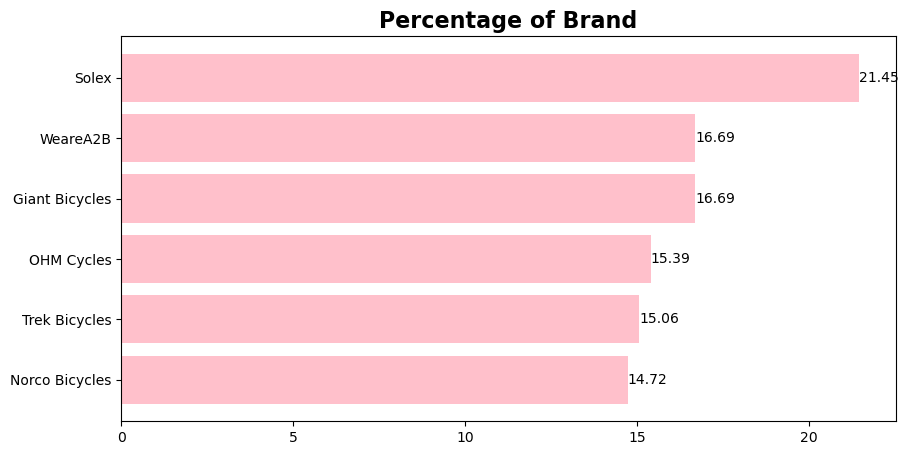

In [921]:
## brand visualizations
fig, ax = plt.subplots(figsize=(10,5))

brand_sort = brand.sort_values(by=['percentage']).reset_index(drop=True)

bars = plt.barh(y=brand_sort['brand'], width= brand_sort['percentage'], color = 'pink')
plt.bar_label(ax.containers[0]) 
plt.title('Percentage of Brand', fontsize=16, fontweight='bold')

### b. Percentage of Product Line with Brand Distribution

In [922]:
line = product.groupby(['brand', 'product_line'])['product_line'].count()
line = line.reset_index(name='count')
line['percentage'] =  (100 * line['count'] / line.groupby('brand')['count'].transform('sum')).round(2)

pvt = line.pivot_table(columns='product_line', index='brand', values=['count', 'percentage'])
pvt.fillna(0)

count                         percentage                  \
product_line   Mountain   Road Standard Touring   Mountain   Road Standard   
brand                                                                        
Giant Bicycles      0.0  569.0   2495.0   176.0       0.00  17.56    77.01   
Norco Bicycles    196.0  908.0   1755.0     0.0       6.86  31.76    61.39   
OHM Cycles          0.0  766.0   1997.0   226.0       0.00  25.63    66.81   
Solex               0.0  523.0   3441.0   200.0       0.00  12.56    82.64   
Trek Bicycles     219.0  968.0   1737.0     0.0       7.49  33.11    59.40   
WeareA2B            0.0  153.0   2476.0   611.0       0.00   4.72    76.42   

                        
product_line   Touring  
brand                   
Giant Bicycles    5.43  
Norco Bicycles    0.00  
OHM Cycles        7.56  
Solex             4.80  
Trek Bicycles     0.00  
WeareA2B         18.86

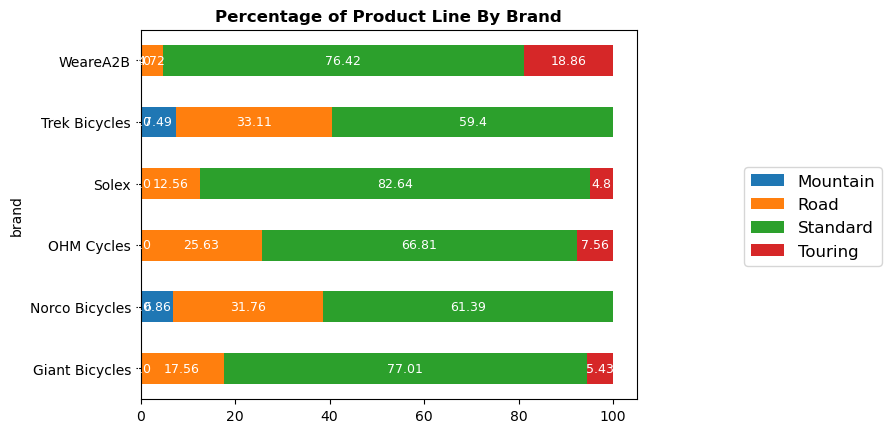

In [923]:
#visualization
pvt_count = line.pivot_table(index='brand', columns='product_line', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Product Line By Brand', fontweight='bold')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=9, color='white')

plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

### c. Percentage of Product Class with Brand Distribution

In [924]:
clas = product.groupby(['brand', 'product_class'])['product_class'].count()
clas = clas.reset_index(name='count')
clas['percentage'] =  (100 * clas['count'] / clas.groupby('brand')['count'].transform('sum')).round(2)

pvt = clas.pivot_table(columns='product_class', index='brand', values=['count', 'percentage'])
pvt.fillna(0)

count                percentage              
product_class    high    low  medium       high    low medium
brand                                                        
Giant Bicycles  767.0  192.0  2281.0      23.67   5.93  70.40
Norco Bicycles  557.0  617.0  1685.0      19.48  21.58  58.94
OHM Cycles      754.0  599.0  1636.0      25.23  20.04  54.73
Solex           555.0  400.0  3209.0      13.33   9.61  77.07
Trek Bicycles   318.0  769.0  1837.0      10.88  26.30  62.82
WeareA2B          0.0  325.0  2915.0       0.00  10.03  89.97

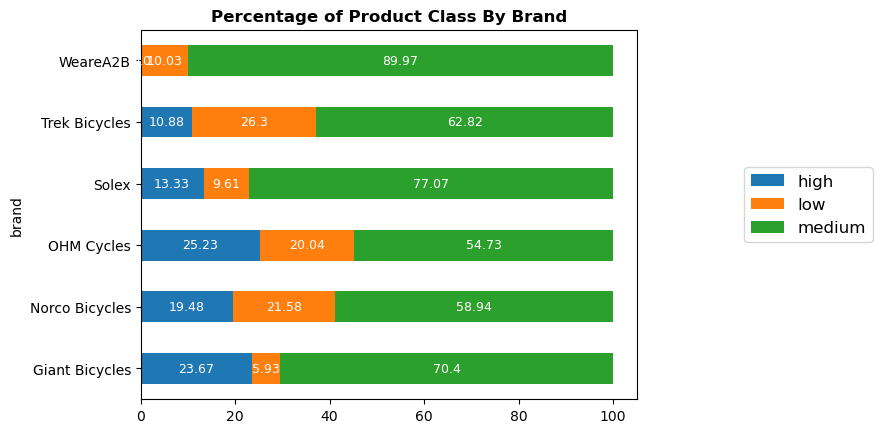

In [925]:
pvt_count = clas.pivot_table(index='brand', columns='product_class', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Product Class By Brand', fontweight='bold')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=9, color='white')
    
plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

### d. Percentage of Product Size with Brand Distribution

In [926]:
size = product.groupby(['brand', 'product_size'])['product_size'].count()
size = size.reset_index(name='count')
size['percentage'] =  (100 * size['count'] / size.groupby('brand')['count'].transform('sum')).round(2)

pvt = size.pivot_table(columns='product_size', index='brand', values=['count', 'percentage'])
pvt

count                percentage              
product_size     large  medium  small      large medium  small
brand                                                         
Giant Bicycles   923.0  1743.0  574.0      28.49  53.80  17.72
Norco Bicycles   404.0  1705.0  750.0      14.13  59.64  26.23
OHM Cycles       193.0  2600.0  196.0       6.46  86.99   6.56
Solex           1065.0  2918.0  181.0      25.58  70.08   4.35
Trek Bicycles    886.0  1505.0  533.0      30.30  51.47  18.23
WeareA2B         423.0  2276.0  541.0      13.06  70.25  16.70

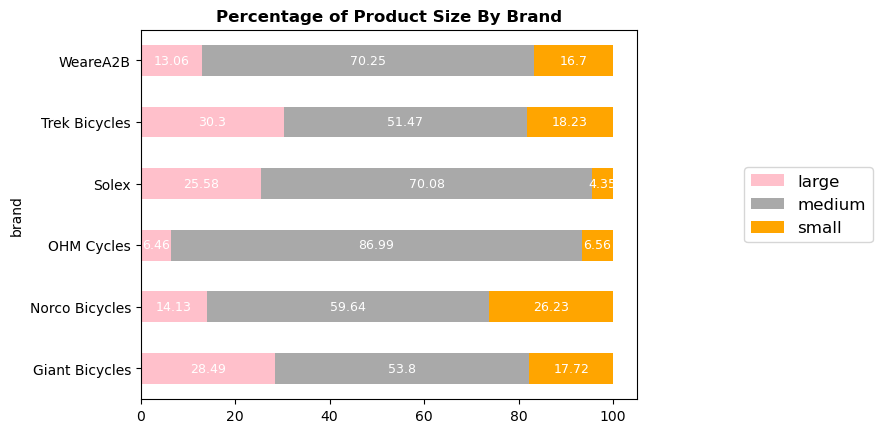

In [927]:
pvt_count = size.pivot_table(index='brand', columns='product_size', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True, color = ['pink', 'darkgrey', 'orange'])
plt.title('Percentage of Product Size By Brand', fontweight='bold')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=9, color='white')
    
plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

### (3) Customer Data

In [928]:
cust = cus_merged.copy()
summary = cust[['gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car', 'state']].describe().T
summary['% top'] = summary['freq']/summary['count']*100
summary

,count,unique,top,freq,% top
gender,19416,3,Female,9736,50.144211
job_title,17114,195,Social Worker,222,1.297184
job_industry_category,16287,9,Manufacturing,3897,23.927058
wealth_segment,19416,3,Mass Customer,9745,50.190564
owns_car,19416,2,Yes,9781,50.375979
state,19416,3,NSW,10364,53.378657


- There are **50%** of customers are **female**.
- Customers have a **variety** of **job titles** with the top job title of **1.3% as social workers**.
- There are **24%** of customers work in the **manufacturing** industry.
- There are **50.19%** of customers come from **Mass Customers**.
- There are **50.38%** of customers **having own car**.
- The majority of customers, **53.38%**, are from **New South Wales**.

### wealth segment

In [929]:
# wealth segment percentage
wealth = cust['wealth_segment'].value_counts().reset_index()
wealth.columns = ['wealth_segment', 'count']
wealth['percentage'] = (wealth['count']/wealth['count'].sum()*100).round(2)
wealth

,wealth_segment,count,percentage
0,Mass Customer,9745,50.19
1,High Net Worth,4955,25.52
2,Affluent Customer,4716,24.29


### state

In [930]:
# state percentage
state = cust['state'].value_counts().reset_index()
state.columns = ['state', 'count']
state['percentage'] = (state['count']/state['count'].sum()*100).round(2)
state

,state,count,percentage
0,NSW,10364,53.38
1,VIC,4908,25.28
2,QLD,4144,21.34


In [931]:
old_cus = float(len(cust['gender']))
new_cus = float(len(NewCustomerList['gender']))

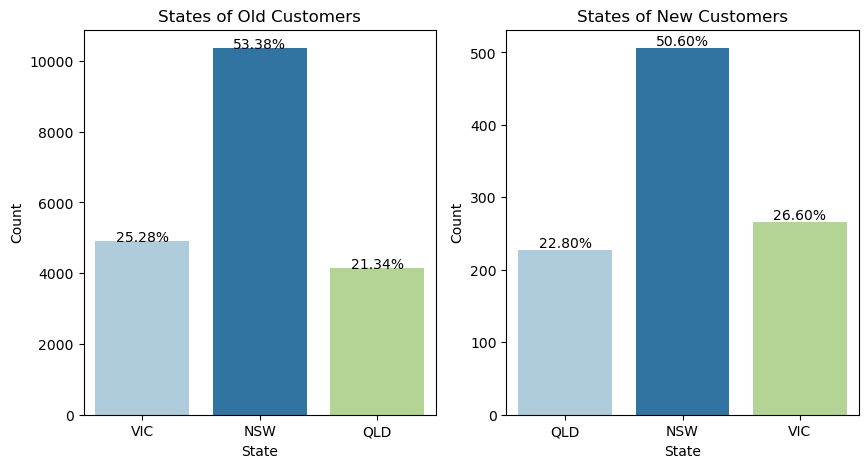

In [932]:
# state visualization
custom_palette = sns.color_palette('Paired', n_colors=3)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.countplot(x="state", data=cust, palette=custom_palette, ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / old_cus) * 100),
            ha="center")
axs[0].set_title('States of Old Customers')
axs[0].set_xlabel('State')
axs[0].set_ylabel('Count')


# Plot the first subplot
sns.countplot(x="state", data=NewCustomerList, palette=custom_palette, ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / new_cus) * 100),
            ha="center")
axs[1].set_title('States of New Customers')
axs[1].set_xlabel('State')
axs[1].set_ylabel('Count')

plt.show()

### job industry

In [933]:
# job industry percentage
industry = cust['job_industry_category'].value_counts().reset_index()
industry.columns = ['job_industry', 'count']
industry['percentage'] = (industry['count']/industry['count'].sum()*100).round(2)
industry

,job_industry,count,percentage
0,Manufacturing,3897,23.93
1,Financial Services,3768,23.14
2,Health,3016,18.52
3,Retail,1718,10.55
4,Property,1251,7.68
5,IT,1041,6.39
6,Entertainment,686,4.21
7,Argiculture,559,3.43
8,Telecommunications,351,2.16


In [934]:
# top 10 job title
title = cust['job_title'].value_counts().reset_index()
title.columns = ['job_title', 'count']
title['percentage'] = (title['count']/title['count'].sum()*100).round(2)
top10title = title.head(10)
top10title

,job_title,count,percentage
0,Social Worker,222,1.30
1,Business Systems Development Analyst,215,1.26
2,Legal Assistant,213,1.24
3,Assistant Professor,207,1.21
4,Internal Auditor,205,1.20
5,Executive Secretary,199,1.16
6,Nuclear Power Engineer,197,1.15
7,Tax Accountant,195,1.14
8,Chemical Engineer,191,1.12
9,Associate Professor,190,1.11


## 4. Features transformation & visualization

### a. Transform DOB to Age column and add to cus_merged and NewCustomerList datasets

#### **Our group will set the target year in 2017 since the program was launched on 2017

In [935]:
cus_merged['DOB'] = pd.to_datetime(cus_merged['DOB'])
target_year = 2017
cus_merged['Age'] = target_year - cus_merged['DOB'].dt.year

In [936]:
# Imputation of age with median
median_age = cus_merged['Age'].median()
cus_merged['Age'].fillna(median_age, inplace=True)

In [937]:
NewCustomerList['DOB'] = pd.to_datetime(NewCustomerList['DOB'])
NewCustomerList['Age'] = target_year - NewCustomerList['DOB'].dt.year

In [938]:
median_age = NewCustomerList['Age'].median()
NewCustomerList['Age'].fillna(median_age, inplace=True)

In [939]:
cus_merged['Age'].value_counts().head()

Age
40.0    1464
39.0    1082
41.0     754
43.0     732
37.0     617
Name: count, dtype: int64

In [940]:
cus_merged['Age'].max()

174.0

In [941]:
### filter the data to normal age range
cus_merged = cus_merged[cus_merged['Age'] < 174]

### b. Change some columns data types

In [942]:
NewCustomerList['Age'] = NewCustomerList['Age'].astype(int)

In [943]:
cus_merged['Age'] = cus_merged['Age'].astype(int)

In [944]:
### fill in some missing tenure values with mean
NewCustomerList['tenure'] = NewCustomerList['tenure'].astype(int)
cus_merged['tenure'] = cus_merged['tenure'].fillna(cus_merged['tenure'].mean())
cus_merged['tenure'] = cus_merged['tenure'].astype(int)

### c. Feature Transformation of gender, deceased_indicator, and owns_car

In [945]:
gender_map = {'Male': 0, 'Female': 1, 'Unspecified': 2}
cus_merged['gender'] = cus_merged['gender'].replace(gender_map)
NewCustomerList['gender'] = NewCustomerList['gender'].replace(gender_map)

In [946]:
deceased_map = {'N': 0, 'Y': 1}
cus_merged['deceased_indicator'] = cus_merged['deceased_indicator'].replace(deceased_map)
NewCustomerList['deceased_indicator'] = NewCustomerList['deceased_indicator'].replace(deceased_map)

In [948]:
car_map = {'No': 0, 'Yes': 1}
cus_merged['owns_car'] = cus_merged['owns_car'].replace(car_map)
NewCustomerList['owns_car'] = NewCustomerList['owns_car'].replace(car_map)

In [386]:
#saving file to csv
#NewCustomerList.to_csv('/Users/super_enbicycle/Documents/UBC/BAMA_517/KPMG/NewCustomerList_cleaned.csv', index = False)
#cus1.to_csv('/Users/super_enbicycle/Documents/UBC/BAMA_517/KPMG/Final_merged.csv', index = False)

## 4. Feature Visualization

#### a. Age distribution

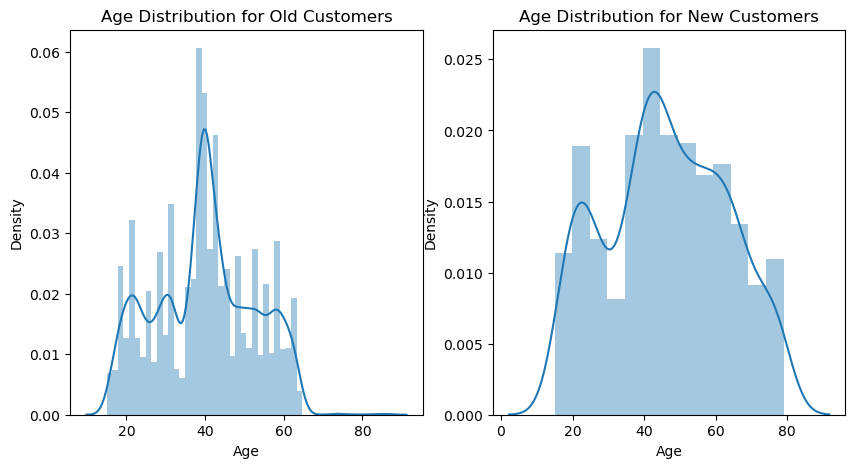

In [949]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.distplot(cus_merged['Age'], ax=axs[0]);
axs[0].set_title('Age Distribution for Old Customers')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Density')

# Plot the second subplot
sns.distplot(NewCustomerList['Age'], ax=axs[1]);
axs[1].set_title('Age Distribution for New Customers')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Density')

plt.show()

In [950]:
with pd.option_context('display.width', None):
    display(pd.concat([NewCustomerList['Age'].describe(), cus_merged['Age'].describe()], axis=1))

,Age,Age
count,1000.000000,19408.000000
mean,46.186000,39.846661
std,16.929087,12.467702
min,15.000000,15.000000
25%,34.750000,31.000000
50%,45.000000,40.000000
75%,60.000000,49.000000
max,79.000000,86.000000


##### From the result table and distribution graph above, we can conclude that there are some differences between the new customer groups and old customer groups. The distributioon shows that the new age group shows the higher mean value(46) than the old customer age group (40). We can see that the two customer groups are not very similar. 

### b. gender distribution

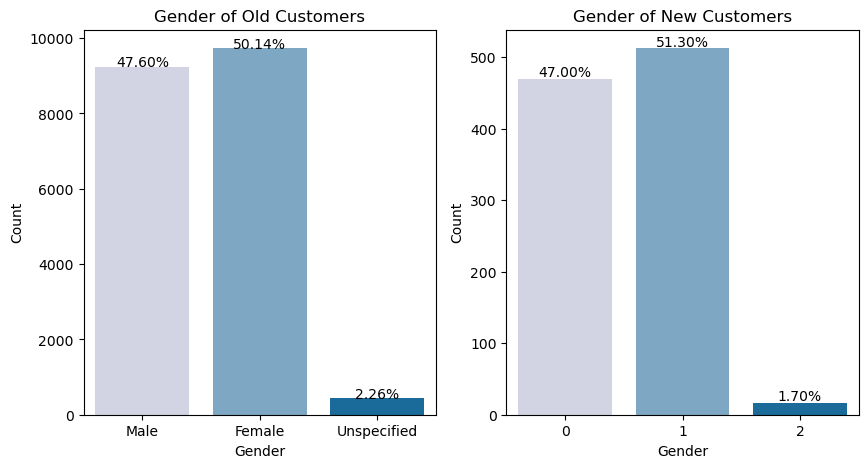

In [951]:
custom_palette = sns.color_palette('PuBu', n_colors=3)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.countplot(x="gender", data=cust, palette=custom_palette, ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / old_cus) * 100),
            ha="center")
axs[0].set_title('Gender of Old Customers')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')


# Plot the first subplot
sns.countplot(x="gender", data=NewCustomerList, palette=custom_palette, ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / new_cus) * 100),
            ha="center")
axs[1].set_title('Gender of New Customers')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Count')

plt.show()

##### From above distribution graph, 'Male': 0, 'Female': 1, 'Unspecified': 2; so we found that the two groups have nearly same distribution in three gender groups

## 5. RFM Analysis

### 1. Data transformation

In [952]:
rfm = cus_merged.copy()

In [953]:
# making last purchase column for recency
most_recent_purchase = rfm['transaction_date'].max()
rfm['last_purchase_days_ago'] = most_recent_purchase - rfm['transaction_date']
rfm['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
rfm['last_purchase_days_ago'] = rfm['last_purchase_days_ago'].astype('int64')

# making column profit for monetery
rfm['profit'] = rfm['list_price'] - rfm['standard_cost']

In [954]:
# making rfm table
rfm_table = rfm.groupby('customer_id').agg({'last_purchase_days_ago': lambda x: x.min(),
                                                    'customer_id': lambda x: len(x),
                                                    'profit': lambda x: x.sum()})

rfm_table.rename(columns={'last_purchase_days_ago': 'recency', 
                          'customer_id': 'frequency', 
                          'profit': 'monetary'}, inplace=True)
rfm_table

,recency,frequency,monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
4,195,2,220.57
5,16,6,2394.94
6,64,5,3946.55
...,...,...,...
3496,256,4,2045.84
3497,52,3,1648.32
3498,127,6,3147.33


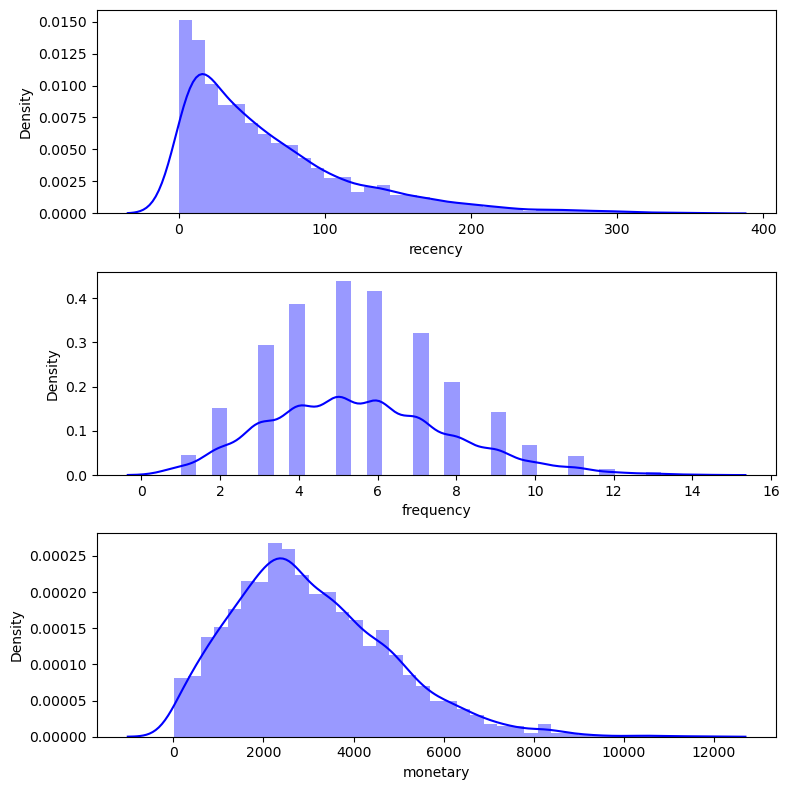

In [955]:
# distribution
rfm = ['recency', 'frequency', 'monetary']

plt.figure(figsize=(8, 8))
for i in range(0, len(rfm)):
    plt.subplot(len(rfm), 1, i+1)
    sns.distplot(rfm_table[rfm[i]], color='blue')
    plt.tight_layout()

#### all are right-skewed

### 2. score

In [956]:
# Recency, if the transaction happened recently give 5 points . 
rfm_table['R_score'] = pd.qcut(rfm_table['recency'], 5, labels=[5, 4, 3, 2, 1])

# Frequency, 5 = Most frequent , 1 = rarely
rfm_table['F_score'] = pd.qcut(rfm_table['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Monetery, 5 = best, 1 = least
rfm_table['M_score'] = pd.qcut(rfm_table['monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm_table.head(5)

,recency,frequency,monetary,R_score,F_score,M_score
customer_id,,,,,,
1,7,11,3018.09,5,5,3
2,128,3,2226.26,1,1,2
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,3,2
6,64,5,3946.55,2,2,4


In [1069]:
# creating rfm score
rfm_table['RFM_segment'] = rfm_table['R_score'].astype(str) + rfm_table['F_score'].astype(str) 
rfm_table['RFM_score'] = ((rfm_table['R_score'].astype('int64') + rfm_table['F_score'].astype('int64') + rfm_table['M_score'].astype('int64')) / 3).round(2)
rfm_table.sample(5)


,recency,frequency,monetary,R_score,F_score,M_score,RFM_segment,RFM_score,Segment,Score
customer_id,,,,,,,,,,
1658,280,4,1469.96,1,2,1,12,1.33,Lost,Circle
322,1,11,10336.77,5,5,5,55,5.00,Top customers,Elite
1549,3,7,2924.48,5,4,3,54,4.00,Top customers,Select
2433,26,10,5108.66,4,5,5,45,4.67,Loyal Customers,Elite
2885,94,9,4839.41,2,5,5,25,4.00,Can't Lose,Select


### 3. segmentation and score label

After calculations on the RFM data we can create customer segments:

| **Segment** | **Interpretation** |
|----|----|
| **Top customers** | recency and frequency are high. [5][4-5]| 
| **Loyal customers**| Buy on a regular basis. Responsive to promotions. [3-4][4-5] |
| **Potential loyalist** | Recent customers with average frequency.[4-5][2-3] |
| **Recent customers** | Bought most recently, but not often. [5][1] |
| **Promised** | Recent shoppers, but frequency score is low. [4][1]|
| **Needs attention** | Above average recency, frequency values. May not bought very recently.[3][3] |
| **About to sleep** | Below average recency and frequency. Will lose them if not reactivated.[3][1-2] |
| **At risk** | Some time since they’ve purchased(recency is low). Need to bring them back! [1-2][3-4]|
| **Can’t lose them** | Used to purchase frequently but haven’t returned for a long time. [1-2]5 |
| **Lost** | Last purchase was long back and low number of orders. May be lost. (R,F are low) [1-2][1-2] |

#### We will use Recency and Frequency to segment our customers

In [958]:
# creating segment
seg_map = {
    r'[1-2][1-2]': 'Lost',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promised',
    r'51': 'Recent Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Top customers'
}

In [959]:
# applying segment
rfm_table['Segment'] = rfm_table['R_score'].astype(str) + rfm_table['F_score'].astype(str)
rfm_table['Segment'] = rfm_table['Segment'].replace(seg_map, regex=True)

Customer score:

| **Score** | RFM_Score |
|---|---|
| **Elite** | 5 - 4.1 |
| **Select** | 4 - 3.1 |
| **Rewards** | 3 - 2.1 |
| **Circle** | 2 - 1.1 |
| **Starter** | 1 - 0 |

In [960]:
# create labels for the scores
rfm_table['Score'] = np.where(rfm_table['RFM_score'] > 4, 'Elite',
                              np.where(rfm_table['RFM_score'] > 3, 'Select',
                                       np.where(rfm_table['RFM_score'] > 2, 'Rewards',
                                                np.where(rfm_table['RFM_score'] > 1, 'Circle',
                                                         'Starter'))))
rfm_table.sample(10)

,recency,frequency,monetary,R_score,F_score,M_score,RFM_segment,RFM_score,Segment,Score
customer_id,,,,,,,,,,
765,24,10,5070.62,4,5,5,455,4.67,Loyal Customers,Elite
465,4,6,3488.79,5,3,4,534,4.00,Potential Loyalists,Select
640,10,8,4278.60,5,5,4,554,4.67,Top customers,Elite
3080,4,9,4665.71,5,5,5,555,5.00,Top customers,Elite
2230,65,7,3119.58,2,4,3,243,3.00,At Risk,Rewards
2031,19,4,1998.35,4,2,2,422,2.67,Potential Loyalists,Rewards
2952,27,5,2543.89,4,3,3,433,3.33,Potential Loyalists,Select
3295,19,8,5246.61,4,5,5,455,4.67,Loyal Customers,Elite
2130,1,8,4253.77,5,5,4,554,4.67,Top customers,Elite


### 4. RFM analysis

In [961]:
rfm_data = rfm_table.reset_index().copy()

#### recency vs frequency

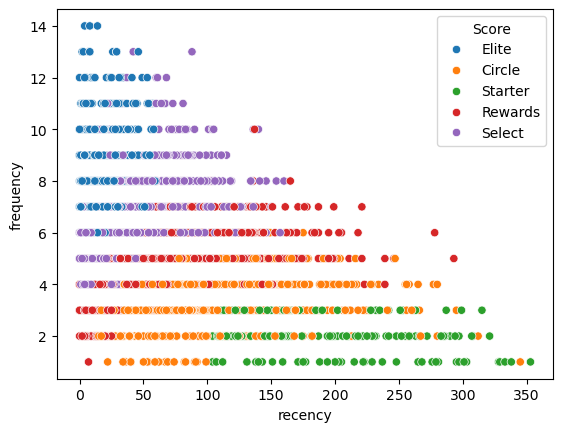

In [962]:
data = pd.DataFrame(data=rfm_data,columns=['customer_id','Score','recency','frequency','monetary'])

# plot data with seaborn
facet = sns.scatterplot(data=data, x='recency', y='frequency', hue='Score', palette='tab10')

#### monetary vs frequency

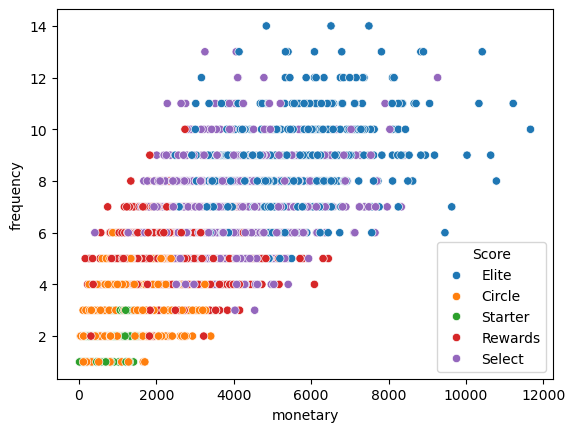

In [963]:
facet = sns.scatterplot(data=data, x='monetary', y='frequency', hue='Score', palette='tab10')

#### score

In [964]:
# create agg dictionary
agg_dict = {'customer_id': 'count', 
            'recency': 'mean',
            'frequency': 'mean',
            'monetary': 'mean'}

In [965]:
score_cat =['Elite', 'Select', 'Rewards', 'Circle', 'Starter']
rfm_data['Score'] = pd.Categorical(rfm_data['Score'], categories = score_cat)

df_sc = rfm_data.groupby('Score').agg(agg_dict).reset_index()
df_sc.rename({'Score': 'Score', 'customer_id': 'count'}, axis=1, inplace=True)
df_sc['count %'] = (100 * df_sc['count'] / df_sc['count'].sum()).round(2)
df_sc['monetary %'] = (100 * df_sc['monetary'] / df_sc['monetary'].sum()).round(2)
df_sc

,Score,count,recency,frequency,monetary,count %,monetary %
0,Elite,579,17.747841,8.604491,5369.648601,16.61,38.59
1,Select,1042,40.011516,6.563340,3745.883013,29.89,26.92
2,Rewards,992,61.018145,4.872984,2487.378327,28.46,17.87
3,Circle,681,101.533040,3.441997,1602.558473,19.54,11.52
4,Starter,192,188.312500,2.130208,710.825625,5.51,5.11


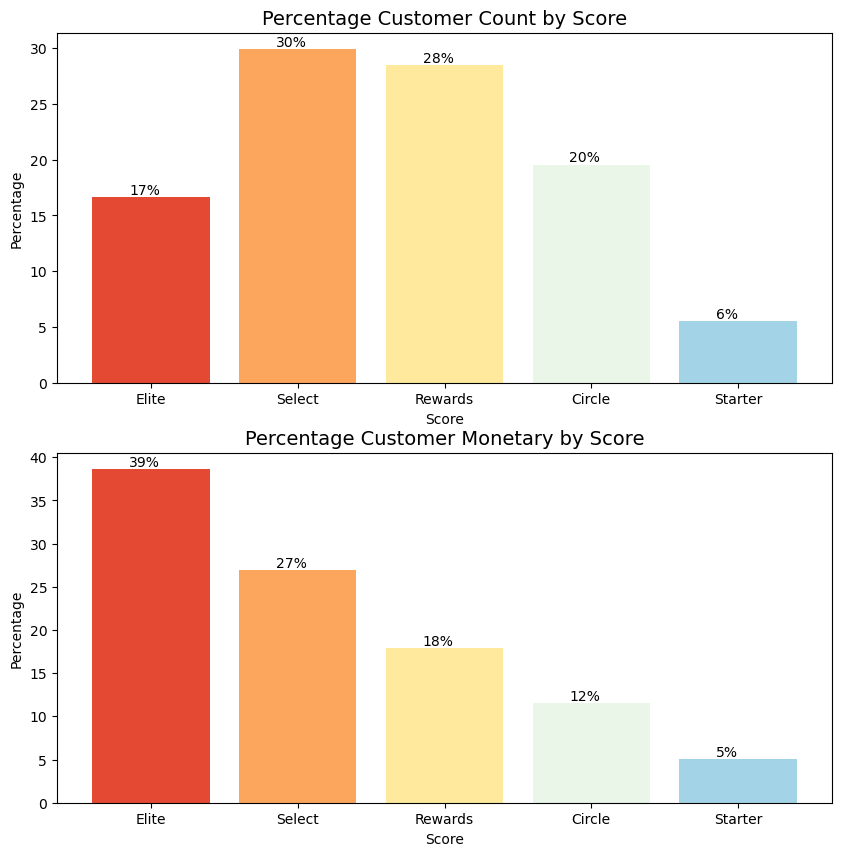

In [966]:
# bar chart - count
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10))

ax[0].bar(x='Score', height='count %', data=df_sc, color=sns.color_palette('RdYlBu'))
ax[1].bar(x='Score', height='monetary %', data=df_sc, color=sns.color_palette('RdYlBu'))

ax[0].set_ylabel('')
ax[0].set_title('Percentage Customer Count by Score', fontsize=14)
ax[0].set_xlabel('Score') 
ax[0].set_ylabel('Percentage')

ax[1].set_ylabel('')
ax[1].set_title('Percentage Customer Monetary by Score', fontsize=14)
ax[1].set_xlabel('Score') 
ax[1].set_ylabel('Percentage')

for p in ax[0].patches:
    ax[0].annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.3))
for p in ax[1].patches:
    ax[1].annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.3))

#### segment

In [967]:
seg = rfm_data.groupby('Segment').agg(agg_dict).reset_index()
seg.rename({'Segment': 'Segment', 'customer_id': 'count'}, axis=1, inplace=True)
seg['count %'] = (100 * seg['count'] / seg['count'].sum()).round(2)
seg['monetary %'] = (100 * seg['monetary'] / seg['monetary'].sum()).round(2)
seg.sort_values(by='count', ascending=False, inplace=True)
seg

,Segment,count,recency,frequency,monetary,count %,monetary %
3,Lost,749,135.393858,3.212283,1754.454339,21.49,6.00
4,Loyal Customers,652,34.648773,7.825153,4366.891948,18.70,14.94
6,Potential Loyalists,539,14.684601,4.910946,2712.205380,15.46,9.28
1,At Risk,498,103.917671,5.883534,3310.886847,14.29,11.33
9,Top customers,380,6.900000,8.105263,4474.346132,10.90,15.31
0,About to Sleep,228,46.008772,3.592105,1867.780088,6.54,6.39
2,Can't Lose,141,86.354610,8.709220,4510.720638,4.04,15.43
5,Need Attention,137,45.262774,5.459854,2988.128102,3.93,10.22
7,Promised,92,22.869565,2.771739,1673.061848,2.64,5.72
8,Recent Customers,70,7.685714,2.757143,1573.204857,2.01,5.38


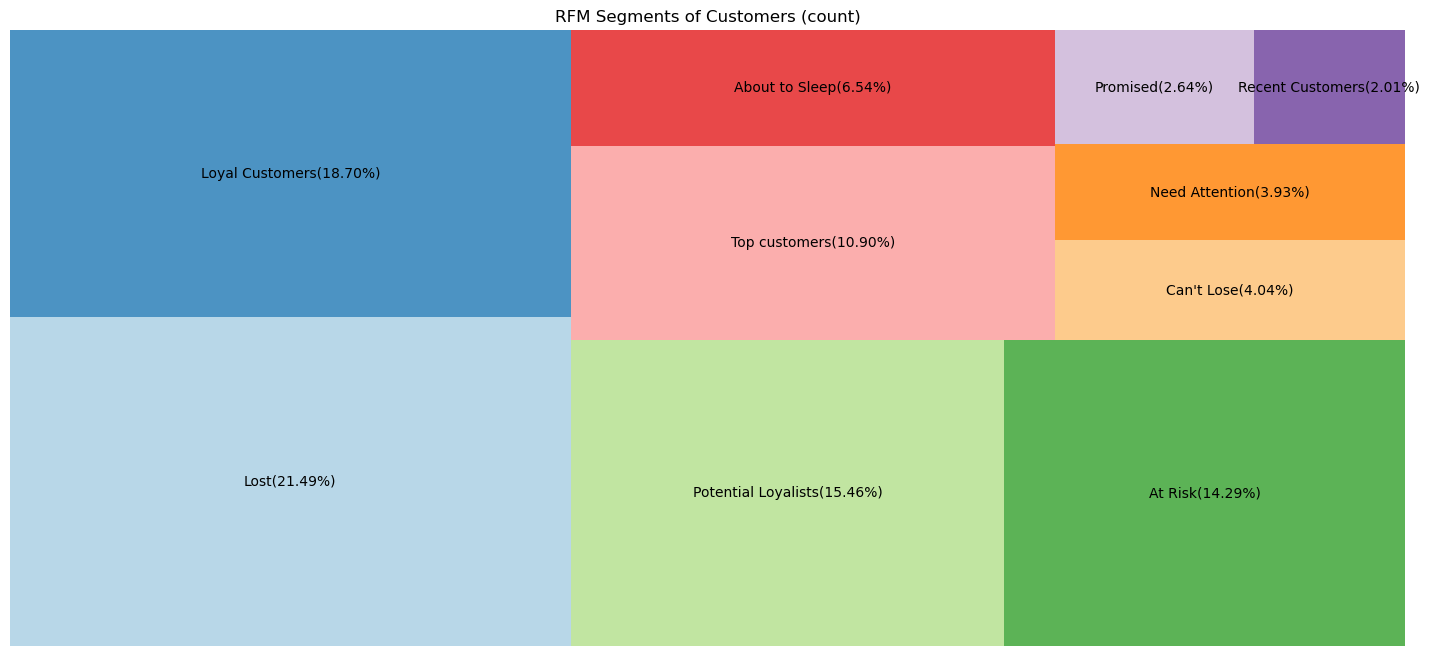

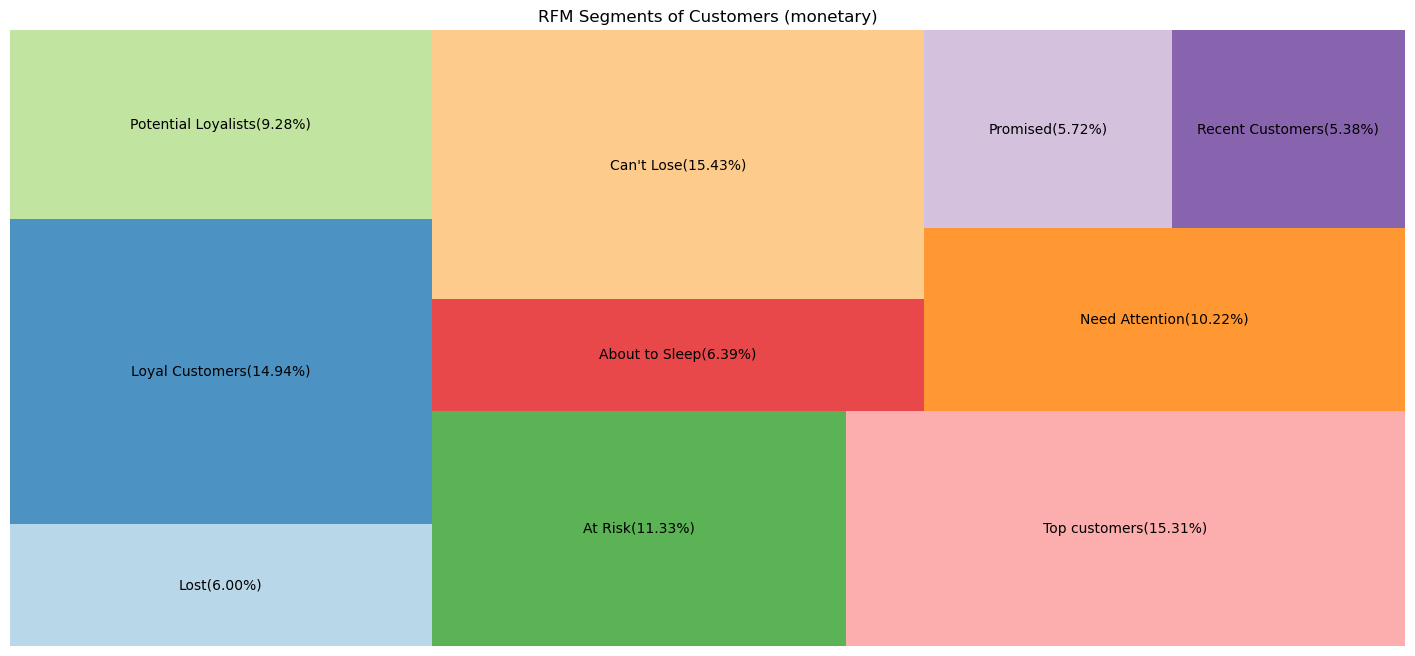

In [968]:
import squarify
import matplotlib.pyplot as plt

for col in ['count', 'monetary']:
    labels = seg['Segment'] + seg[col + ' %'].apply(lambda x: '({0:.2f}%)'.format(x))

    fig, ax = plt.subplots(figsize=(18,8))
    squarify.plot(sizes=seg[col], label=labels, alpha=.8, color=sns.color_palette('Paired', len(seg)))
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

- **Most of customers** come from the **lost, Loyal Customers, and Potential Loyalist**.
- **Most of profit** comes from the segment of **Can't Lose, top customers, and Loyal Customers**.

## 5. Interpretation & Insight

In [969]:
# Aggregate data by each customer
rfm1 = rfm_data.groupby(['Score','Segment'])['Segment'].count()
rfm1 = rfm1.reset_index(name='count')
rfm1['percentage'] =  (100 * rfm1['count'] / rfm1.groupby('Score')['count'].transform('sum')).round(2)
# rfm1
pvt = rfm1.pivot_table(index='Score', columns='Segment', values='percentage')
pvt

Segment,About to Sleep,At Risk,Can't Lose,Lost,Loyal Customers,Need Attention,Potential Loyalists,Promised,Recent Customers,Top customers
Score,,,,,,,,,,
Elite,0.00,0.00,0.00,0.00,47.15,0.00,2.76,0.00,0.00,50.09
Select,0.19,11.90,12.38,0.00,33.40,5.66,27.54,0.10,0.19,8.64
Rewards,10.69,31.65,1.21,10.18,3.12,7.86,23.79,4.64,6.85,0.00
Circle,17.62,8.81,0.00,66.96,0.00,0.00,0.00,6.61,0.00,0.00
Starter,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00


|Customer Score|%|RFM Segment|RFM Interpretation|Insight & Recommendation|
|---|---|---|---|---|
|Elite|17%|50% top customers; 47% Loyal Customers|Customers who transacted recently, buy often, with a high or low amount of monetary spending. The majority of Elite customers are Top customers and Loyal Customers.| To retain Top customers, companies can reward them. And to convert Loyal Customers into Top customers, the company should engage them more frequently, ask for reviews, or upsell higher-value products.|
|Select|30%|33.4% Loyal Customers; 27% Potential Loyalists|Customers who made their last transaction some time ago, spend a good amount and purchase more than once or often. RFM segmentation shows that 33.4% of them are Loyal Customers and 27% are Potential Loyalists.| Companies should offer loyalty programs with benefits like points or discounts for customers and recommend other products to them.|
|Rewards|28%|32% At Risk|Customers who spend big money and purchase often but haven't purchased for a long time. RFM segmentation in Rewards customer shows that majority 32% of them are At Risk|Companies should bring them back by sending personalized emails or newsletters to reconnect and offer promotions or discounts.|
|Circle|20%|67% Lost|Customers who made their last transaction a long time ago, and who have made few purchases. RFM segmentation shows that majority of Circle customers are Lost.|Offer other personalized or relevant products, and give more special discount.|
|Starter|6%|100% Lost|Can identify as a lost customer. Lowest recency, frequency, and monetary scores.| Companies can revive interest with outreach campaigns or ignore them otherwise.|

## 6. Attach RFM and scoring labels to the merged dataset

In [1025]:
# copy customer demographic dataset
customer = cus1.copy()

In [1026]:
rfm_data1 = rfm_data[['customer_id', 'RFM_score', 'Score', 'Segment']].copy()

In [1027]:
# merge dataset by id customers
allcust = pd.merge(customer, rfm_data1, on = 'customer_id')
allcust.sample(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,state,property_valuation,RFM_score,Score,Segment
96,102,Langsdon,Tranfield,Male,51,1956-11-27,Quality Control Specialist,Manufacturing,Affluent Customer,N,No,16.0,61.0,NSW,9,3.33,Select,Loyal Customers
3121,3133,Eda,MacCheyne,Female,89,1999-05-10,Quality Control Specialist,Manufacturing,Mass Customer,N,No,2.0,18.0,NSW,8,3.67,Select,Top customers
980,988,Andree,Simonato,Female,35,1981-01-15,Director of Sales,Manufacturing,High Net Worth,N,No,7.0,36.0,QLD,6,1.00,Starter,Lost


In [1028]:
### summary statistics
allcust.describe().T.round(2)

,count,mean,min,25%,50%,75%,max,std
past_3_years_bike_related_purchases,3486.0,48.790591,0.0,24.0,48.0,73.0,99.0,28.616713
DOB,3410,1977-09-03 06:04:26.041055712,1931-10-23 00:00:00,1968-04-23 00:00:00,1977-08-29 00:00:00,1987-03-27 18:00:00,2002-03-11 00:00:00,NaN
tenure,3410.0,10.680645,1.0,6.0,11.0,15.0,22.0,5.673559
Age,3410.0,39.827273,15.0,30.0,40.0,49.0,86.0,12.582788
property_valuation,3486.0,7.514343,1.0,6.0,8.0,10.0,12.0,2.822983
RFM_score,3486.0,3.005832,1.0,2.0,3.0,4.0,5.0,1.097871


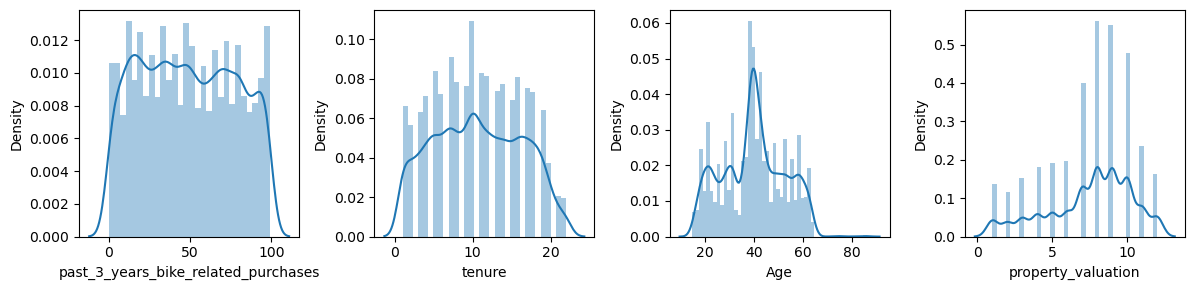

In [1029]:
# distribution
nums = ['past_3_years_bike_related_purchases', 'tenure', 'Age', 'property_valuation']
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.distplot(cus_merged[nums[i]])
    plt.tight_layout()

<Axes: >

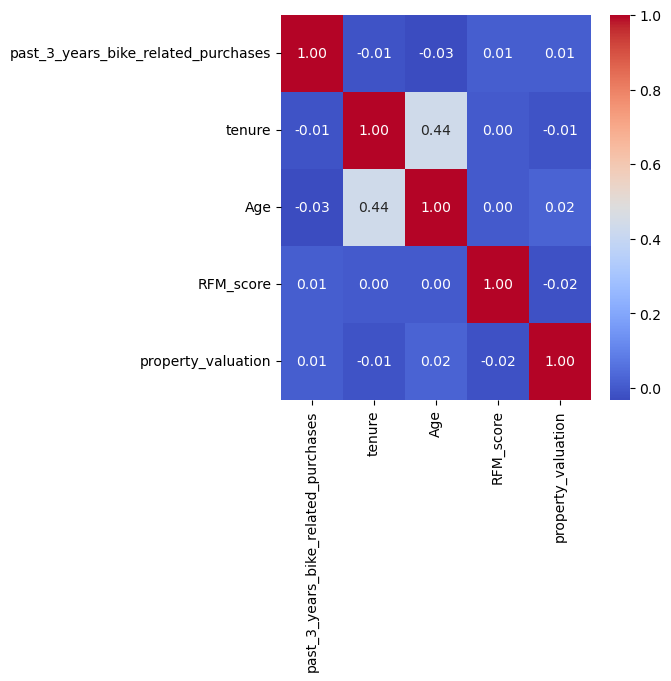

In [1030]:
# multivariate analysis
nums = ['past_3_years_bike_related_purchases', 'tenure', 'Age', 'RFM_score','property_valuation']
plt.figure(figsize = (5,5))
sns.heatmap(allcust[nums].corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')

- Overall, the numerical columns above have a **low correlation with the RFM score**.
- The **Ages** column has a **high positive correlation** with **tenure**

In [1059]:
# Save both datasets to Assets folder. Because some transformations will be done.
directory = r'/Users/super_enbicycle/Documents/UBC/BAMA_517/KPMG'
allcust.to_csv(os.path.join(directory, 'Final_merged1.csv'), index=False)

### categorical column analysis

In [883]:
#allcust['gender']= allcust['gender'].astype('object')
#allcust['job_industry_category']= allcust['job_industry_category'].astype('object')
#allcust['wealth_segment']= allcust['wealth_segment'].astype('object')
#allcust['owns_car']= allcust['owns_car'].astype('object')
#allcust['state']= allcust['state'].astype('object')
#allcust['Segment']= allcust['Segment'].astype('object')

In [1031]:
##### 补充这个（是在数据加载不出来）
cate = ['gender', 'job_industry_category', 'wealth_segment', 'owns_car', 'state', 'Segment']
allcust[cate].describe().T

,count,unique,top,freq
gender,3486,3,Female,1757
job_industry_category,2926,9,Manufacturing,703
wealth_segment,3486,3,Mass Customer,1743
owns_car,3486,2,Yes,1766
state,3486,3,NSW,1864
Segment,3486,10,Lost,749


## 7. Targeted Customer Demographic Analysis

#### so we decided to deeply focus on the Elite customer groups

In [1057]:
# filtering data Diamond Customers
target = allcust[allcust['Score'] == 'Elite']
target.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,state,property_valuation,RFM_score,Score,Segment
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,64.0,NSW,10,4.33,Elite,Top customers
6,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,55.0,NSW,4,4.67,Elite,Loyal Customers
20,25,Geoff,Assaf,Male,72,1976-12-02,Accounting Assistant III,Financial Services,Mass Customer,N,Yes,21.0,41.0,QLD,3,5.00,Elite,Top customers
24,29,Mona,Sancraft,Female,62,1968-06-22,Safety Technician III,Manufacturing,Mass Customer,N,No,19.0,49.0,QLD,7,4.67,Elite,Loyal Customers
31,37,Laurie,Dwerryhouse,Female,46,1985-12-22,Social Worker,Health,High Net Worth,N,No,16.0,32.0,QLD,1,5.00,Elite,Top customers


In [1058]:
# Save both datasets to Assets folder. Because some transformations will be done.
directory = r'/Users/super_enbicycle/Documents/UBC/BAMA_517/KPMG'
target.to_csv(os.path.join(directory, 'Elite.csv'), index=False)

In [1033]:
#### summary statistics
target.describe().T.round(2)

,count,mean,min,25%,50%,75%,max,std
past_3_years_bike_related_purchases,579.0,48.806563,0.0,24.5,48.0,73.0,99.0,28.609419
DOB,558,1978-05-02 17:25:09.677419360,1931-10-23 00:00:00,1969-01-31 00:00:00,1977-12-16 12:00:00,1988-05-15 06:00:00,2001-11-30 00:00:00,NaN
tenure,558.0,10.629032,1.0,6.0,11.0,16.0,22.0,5.89681
Age,558.0,39.173835,16.0,29.0,40.0,48.0,86.0,12.809482
property_valuation,579.0,7.490501,1.0,6.0,8.0,9.0,12.0,2.791701
RFM_score,579.0,4.605509,4.33,4.33,4.67,4.67,5.0,0.259859


In [1034]:
allcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3486 entries, 0 to 3485
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3486 non-null   object        
 1   first_name                           3486 non-null   object        
 2   last_name                            3374 non-null   object        
 3   gender                               3486 non-null   object        
 4   past_3_years_bike_related_purchases  3486 non-null   int64         
 5   DOB                                  3410 non-null   datetime64[ns]
 6   job_title                            3065 non-null   object        
 7   job_industry_category                2926 non-null   object        
 8   wealth_segment                       3486 non-null   object        
 9   deceased_indicator                   3486 non-null   object        
 10  owns_car    

In [1035]:
#### categorical analysis
cate = ['gender', 'job_industry_category', 'wealth_segment', 'owns_car', 'state', 'Segment']
target[cate].describe().T

,count,unique,top,freq
gender,579,3,Male,286
job_industry_category,486,9,Financial Services,127
wealth_segment,579,3,Mass Customer,292
owns_car,579,2,Yes,291
state,579,3,NSW,301
Segment,579,3,Top customers,290


In [1036]:
# percentage gender
gender = target['gender'].value_counts().reset_index()
gender.columns = ['gender', 'count']
gender['percentage'] = (gender['count']/gender['count'].sum()*100).round(2)
gender

,gender,count,percentage
0,Male,286,49.40
1,Female,272,46.98
2,Unspecified,21,3.63


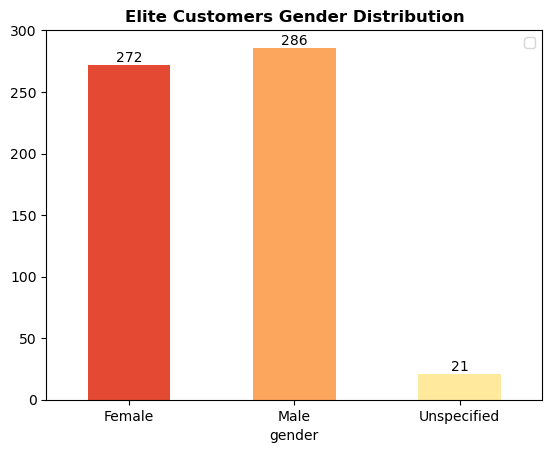

In [1064]:
# calculating data
group = target.groupby(['gender'])['customer_id'].count()
group = group.reset_index(name='count')

# creating visualization
x = group.plot(kind='bar', x='gender', y='count', color=sns.color_palette('RdYlBu'))
plt.title('Elite Customers Gender Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# showing label in bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

Text(0.5, 1.0, 'Elite Customers Gender \nvs Median Tenure Distributions')

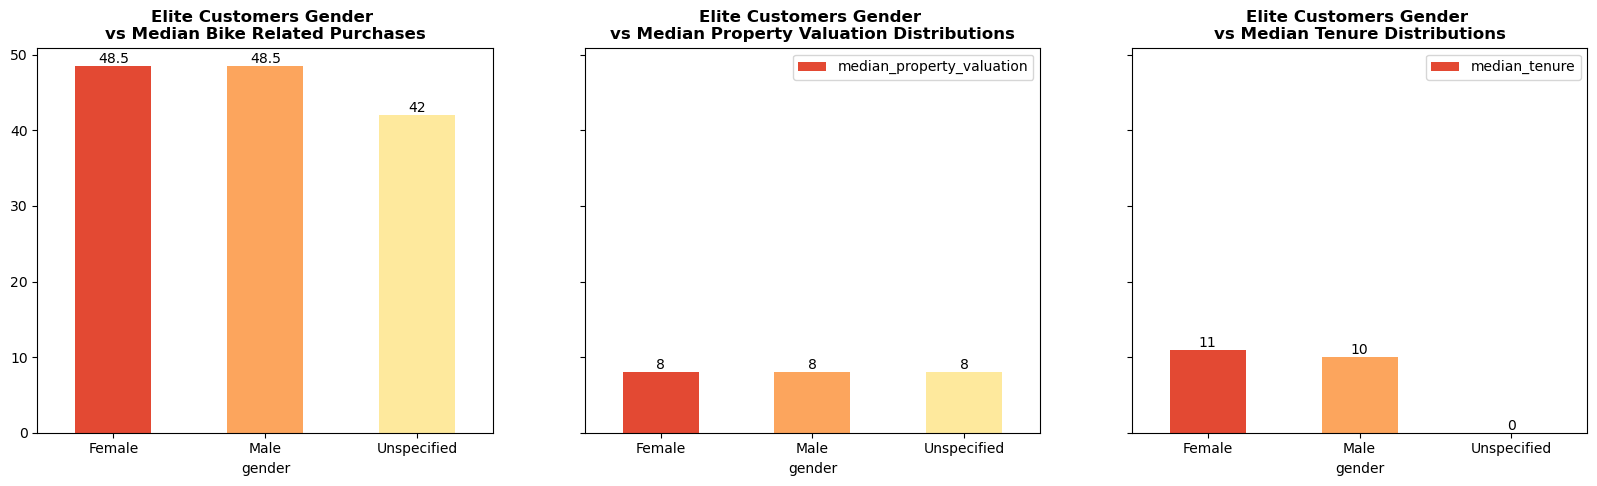

In [1065]:
# calculating value
bike = target.groupby(['gender'])['past_3_years_bike_related_purchases'].median().reset_index(name='median_past_3_years_bike_related_purchases')
properti = target.groupby(['gender'])['property_valuation'].median().reset_index(name='median_property_valuation')
tenure = target.groupby(['gender'])['tenure'].median().reset_index(name='median_tenure')

# visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True, sharey=True)
ax1 = bike.plot(kind='bar', x='gender', y='median_past_3_years_bike_related_purchases', color=sns.color_palette('RdYlBu'), ax=axes[0])
ax2 = properti.plot(kind='bar', x='gender', y='median_property_valuation', color=sns.color_palette('RdYlBu'), ax=axes[1])
ax3 = tenure.plot(kind='bar', x='gender', y='median_tenure', color=sns.color_palette('RdYlBu'), ax=axes[2])

# giving label
axes[0].bar_label(ax1.containers[0]) 
axes[1].bar_label(ax2.containers[0]) 
axes[2].bar_label(ax3.containers[0])

axes[0].legend().remove()
plt.setp(ax1.get_xticklabels() + ax2.get_xticklabels() + ax3.get_xticklabels(), rotation=360)
axes[0].set_title('Elite Customers Gender \nvs Median Bike Related Purchases', fontweight='bold')
axes[1].set_title('Elite Customers Gender \nvs Median Property Valuation Distributions', fontweight='bold')
axes[2].set_title('Elite Customers Gender \nvs Median Tenure Distributions', fontweight='bold')

#### Elite Customers Gender with Age class

In [1046]:
#### 分 age class
# percentage age
age = target['Age'].value_counts().reset_index()
age.columns = ['Age', 'count']
age['percentage'] = (age['count']/age['count'].sum()*100).round(2)
age.head()

,Age,count,percentage
0,39.0,37,6.63
1,41.0,29,5.20
2,40.0,28,5.02
3,22.0,22,3.94
4,37.0,21,3.76


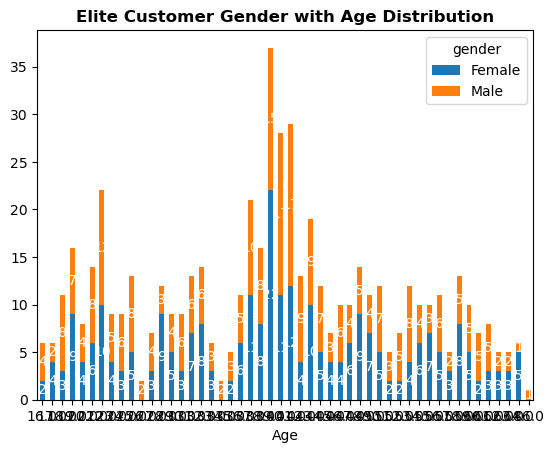

In [1066]:
# calculating data
group = target.groupby(['Age', 'gender'])['customer_id'].count()
group = group.reset_index(name='count')
pvt = group.pivot_table(index='Age', columns='gender', values='count')

# creating visualization
ax = pvt.plot(kind='bar', stacked=True)
plt.title('Elite Customer Gender with Age Distribution', fontweight='bold')
plt.xticks(rotation=360)

# showing label in bars
for p in ax.patches:
    left, bottom, width, height =  p.get_bbox().bounds
    if height > 0 :
        ax.annotate("{0:.0f}".format(height), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='w')

#### wealth with age class


In [1047]:
# 注意：percentage wealth with age class
wealth = target['wealth_segment'].value_counts().reset_index()
wealth.columns = ['wealth_segment', 'count']
wealth['percentage'] = (wealth['count']/wealth['count'].sum()*100).round(2)
wealth

,wealth_segment,count,percentage
0,Mass Customer,292,50.43
1,High Net Worth,157,27.12
2,Affluent Customer,130,22.45


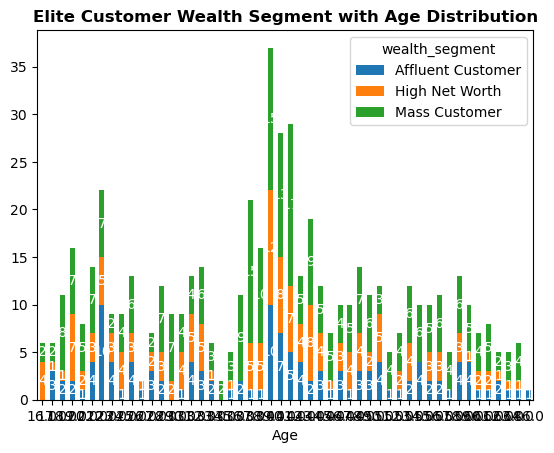

In [1067]:
# calculating data
group = target.groupby(['Age', 'wealth_segment'])['customer_id'].count()
group = group.reset_index(name='count')
pvt = group.pivot_table(index='Age', columns='wealth_segment', values='count')

# creating visualization
ax = pvt.plot(kind='bar', stacked=True)
plt.title('Elite Customer Wealth Segment with Age Distribution', fontweight='bold')
plt.xticks(rotation=360)

# showing label in bars
for p in ax.patches:
    left, bottom, width, height =  p.get_bbox().bounds
    if height > 0 :
        ax.annotate("{0:.0f}".format(height), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='w')

#### state

In [1051]:
# percentage state
state = target['state'].value_counts().reset_index()
state.columns = ['state', 'count']
state['percentage'] = (state['count']/state['count'].sum()*100).round(2)
state

,state,count,percentage
0,NSW,301,51.99
1,VIC,153,26.42
2,QLD,125,21.59


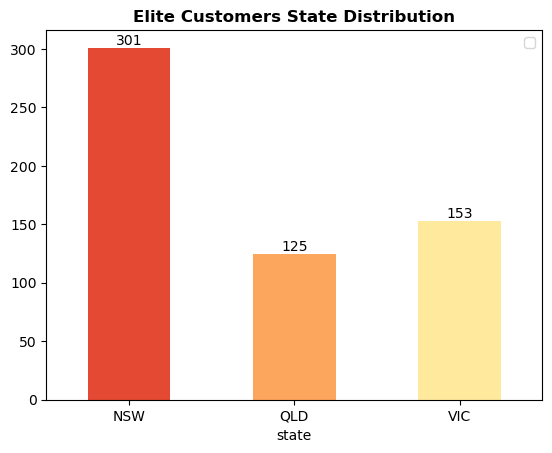

In [1068]:
# calculating data
group = target.groupby(['state'])['customer_id'].count()
group = group.reset_index(name='count')

# creating visualization
x = group.plot(kind='bar', x='state', y='count', color=sns.color_palette('RdYlBu'))
plt.title('Elite Customers State Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# showing label in bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

#### job industry

In [1060]:
# percentage state
industry = target['job_industry_category'].value_counts().reset_index()
industry.columns = ['job_industry_category', 'count']
industry['percentage'] = (industry['count']/state['count'].sum()*100).round(2)
industry

,job_industry_category,count,percentage
0,Financial Services,127,21.93
1,Manufacturing,97,16.75
2,Health,94,16.23
3,Retail,53,9.15
4,IT,38,6.56
5,Property,35,6.04
6,Entertainment,19,3.28
7,Argiculture,13,2.25
8,Telecommunications,10,1.73


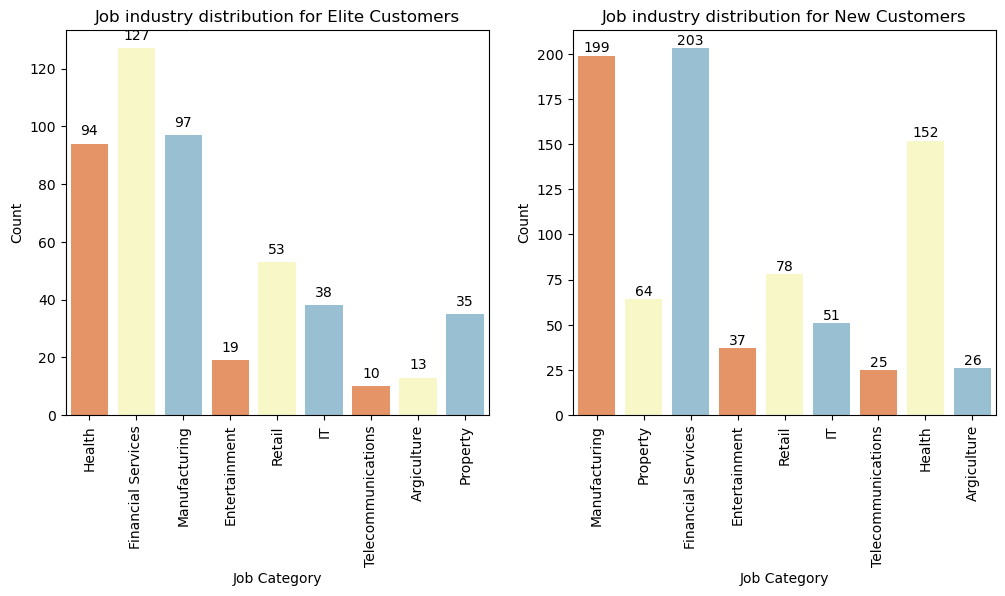

In [1062]:
custom_palette = sns.color_palette('RdYlBu', n_colors=3)
fig, axs = plt.subplots(ncols=2, figsize=(12,5))

# Plot the first subplot
sns.countplot(x="job_industry_category", data=target, palette=custom_palette, orient='v', ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.0f}'.format(height),
            ha="center")
    
axs[0].set_title("Job industry distribution for Elite Customers")
axs[0].set_xlabel('Job Category')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_ylabel('Count')


# Plot the second subplot
sns.countplot(x="job_industry_category", data=NewCustomerList, palette=custom_palette, orient='v', ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height + 2,
            '{:.0f}'.format(height),
            ha="center")
    
axs[1].set_title("Job industry distribution for New Customers")
axs[1].set_xlabel('Job Category')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_ylabel('Count')

plt.show()

#### property valuation

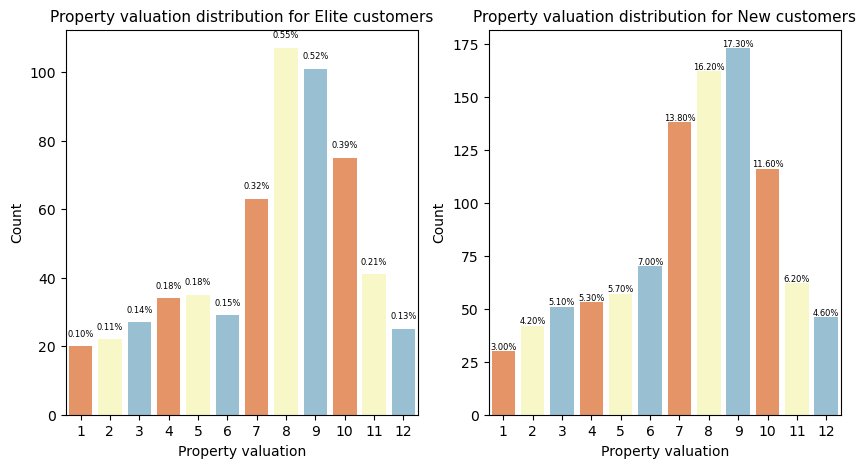

In [1063]:
custom_palette = sns.color_palette('RdYlBu', n_colors=3)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.countplot(x="property_valuation", data=target, palette=custom_palette, orient='v', ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / old_cus) * 100),
            ha="center",
            fontsize=6)
    
axs[0].set_title('Property valuation distribution for Elite customers', fontsize=11)
axs[0].set_xlabel('Property valuation')
axs[0].set_ylabel('Count')


# Plot the second subplot
sns.countplot(x="property_valuation", data=NewCustomerList, palette=custom_palette, orient='v', ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height + 1,
            '{:.2f}%'.format((height / new_cus) * 100),
            ha="center",
            fontsize=6)
    
axs[1].set_title('Property valuation distribution for New customers', fontsize=11)
axs[1].set_xlabel('Property valuation')
axs[1].set_ylabel('Count')

plt.show()

#### focus on group 7-10 range

so our criteria based on below, 
Tablueu visualization dashboard
- Aged between 35 - 55 (age_class 40 - 50)??
- wealth segment with age class
- Work in  manufacture, financial services, or health industry.
- Classified as mass customer
- Live in New South Wales
- Have property valuation at 7-10 range

## 5. Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

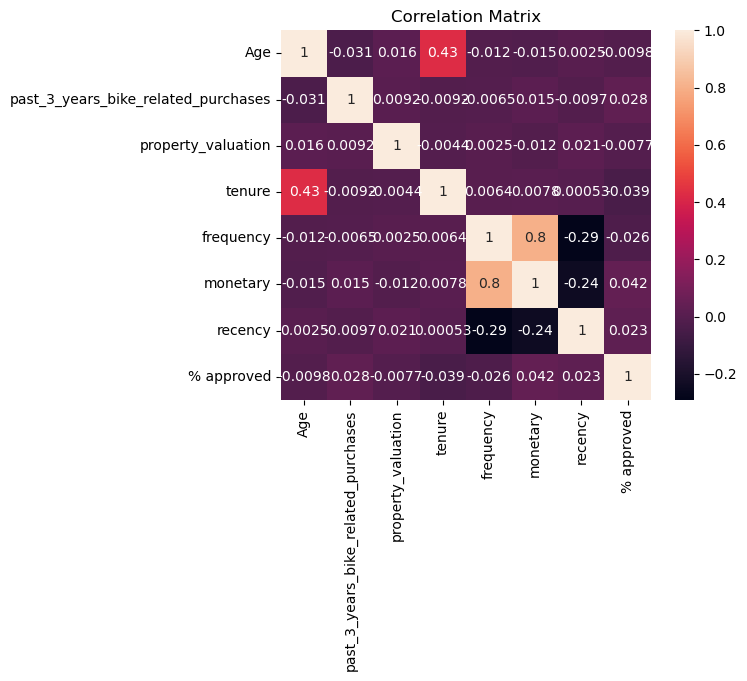

In [410]:
df_subset = cus1[['Age', 'past_3_years_bike_related_purchases', 'property_valuation', 'tenure', 'frequency', 'monetary',  'recency', '% approved']]
mat = df_subset.corr()
corr_matrix = df_subset.corr()
sns.heatmap(mat, square=True, annot = True)
plt.title('Correlation Matrix')

In [411]:
# Save both datasets to Assets folder. Because some transformations will be done.
directory = r'/Users/super_enbicycle/Documents/UBC/BAMA_517/KPMG'
cus1.to_csv(os.path.join(directory, 'Final_merged.csv'), index=False)
NewCustomerList.to_csv(os.path.join(directory, 'NewCustomerList.csv'), index=False)
Transactions.to_csv(os.path.join(directory, 'Transactions.csv'), index=False)